## Projet IA Pour L'image
### SVM sur la base "Cats vs Dogs"

##### Installations nécessaires
pip install -U scikit-learn

pip install PIL

pip install matplotlib

#### Architecture du projet

In [1]:
from sklearn.svm import SVC # Support Vector for Classification
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

import os
import random

from PIL import Image,ImageFilter

import matplotlib.pyplot as plt

In [2]:
base_directory = '.\\dataset_CatVsDogs'
train_directory = os.path.join(base_directory, 'training_set')
test_directory = os.path.join(base_directory, 'test_set')

train_cats_directory = os.path.join(train_directory, 'cats')
train_dogs_directory = os.path.join(train_directory, 'dogs')
test_cats_directory = os.path.join(test_directory, 'cats')
test_dogs_directory = os.path.join(test_directory, 'dogs')

train_cat_names = os.listdir(train_cats_directory)
train_dog_names = os.listdir(train_dogs_directory)

test_cat_names = os.listdir(test_cats_directory)
test_dog_names = os.listdir(test_dogs_directory)

train_images = train_cat_names + train_dog_names
test_images = test_cat_names + test_dog_names

length_sample = int(len(train_images)-1)
random.shuffle(train_images)
random.shuffle(test_images)

train_images = train_images[:length_sample]
test_images = test_images[:length_sample]

In [3]:
Y_train = []
for i in train_images:
    if 'dog' in i:
        Y_train.append(1)
    else:
        Y_train.append(0)
        
Y_test = []
for i in test_images:
    if 'dog' in i:
        Y_test.append(1)
    else:
        Y_test.append(0)

In [4]:
X_train = []
for i in train_images:
    if ('dog' in i):
        filename = '.\\dataset_CatVsDogs\\training_set\\dogs\\'+i  
    else :
        filename = '.\\dataset_CatVsDogs\\training_set\\cats\\'+i 
    pil_im = Image.open(filename).convert('L')
    
    size=64,64
    pil_im = pil_im.resize(size, Image.ANTIALIAS)
    #pil_im =pil_im.filter(ImageFilter.FIND_EDGES)
    pil_im=pil_im.filter(ImageFilter.GaussianBlur(255))
    pix_val=pil_im.histogram() 
    
    X_train.append(pix_val)

In [5]:
X_test = []
for i in test_images:
    if ('dog' in i):
        filename = '.\\dataset_CatVsDogs\\test_set\\dogs\\'+i  
    else :
        filename = '.\\dataset_CatVsDogs\\test_set\\cats\\'+i 
    pil_im = Image.open(filename).convert('L')
    
    size=64,64
    pil_im = pil_im.resize(size, Image.ANTIALIAS)
    #pil_im =pil_im.filter(ImageFilter.FIND_EDGES)
    pil_im=pil_im.filter(ImageFilter.GaussianBlur(255))
    pix_val=pil_im.histogram() 
    
    X_test.append(pix_val)

In [6]:
# Construction du modèle
#classifier = SVC(kernel = 'linear', random_state = 0)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
# Faire de nouvelles prédictions
Y_pred = classifier.predict(X_test) 

Score de précision : 0.5145


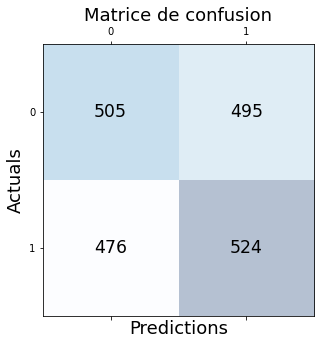

In [7]:
# Accuracy
accuracy=accuracy_score(Y_test,Y_pred)
print("Score de précision : " + str(accuracy) )
# Matrice de confusion

cm = confusion_matrix(Y_test, Y_pred) 

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Matrice de confusion', fontsize=18)
plt.show()